# Importing Libraries

In [1]:
import pandas as pd
import numpy as mp
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Loading Dataset

In [2]:
df=pd.read_csv(r'C:\Users\Mahaveer\Downloads\Iris.csv')

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df=df.set_index('Id')

In [5]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


# Exploratory Data Analysis

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [7]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
df['Species'].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

Text(0, 0.5, 'Petal Width')

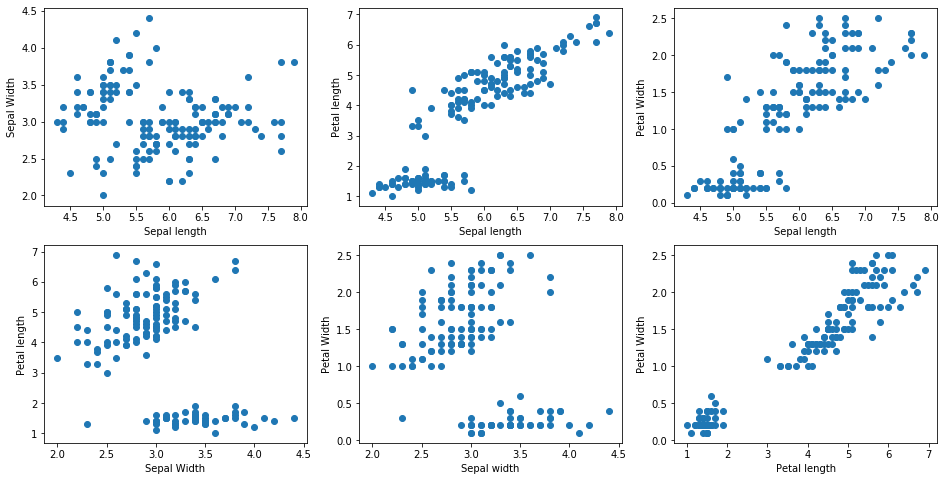

In [9]:
fig= plt.figure(figsize=(16,8))
plt.subplot(2,3,1)
plt.scatter(df.SepalLengthCm,df.SepalWidthCm)
plt.xlabel('Sepal length')
plt.ylabel('Sepal Width') 

plt.subplot(2,3,2)
plt.scatter(df.SepalLengthCm,df.PetalLengthCm)
plt.xlabel('Sepal length')
plt.ylabel('Petal length') 

plt.subplot(2,3,3)
plt.scatter(df.SepalLengthCm,df.PetalWidthCm)
plt.xlabel('Sepal length')
plt.ylabel('Petal Width') 

plt.subplot(2,3,4)
plt.scatter(df.SepalWidthCm,df.PetalLengthCm)
plt.ylabel('Petal length')
plt.xlabel('Sepal Width') 

plt.subplot(2,3,5)
plt.scatter(df.SepalWidthCm,df.PetalWidthCm)
plt.xlabel('Sepal width')
plt.ylabel('Petal Width') 

plt.subplot(2,3,6)
plt.scatter(df.PetalLengthCm,df.PetalWidthCm)
plt.xlabel('Petal length')
plt.ylabel('Petal Width') 

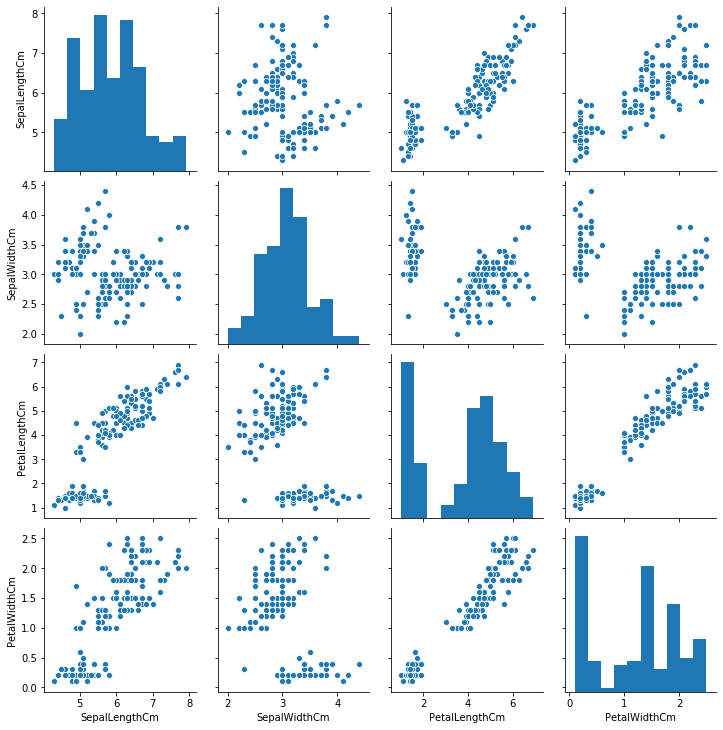

In [24]:
sns.pairplot(df)

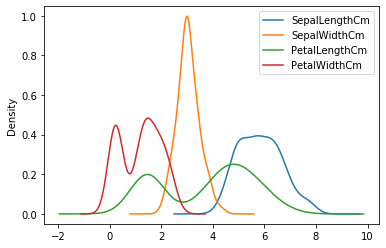

In [10]:
df.plot.kde()

# K-means Clustering 

In [11]:
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [30]:
X = df[['SepalLengthCm','PetalLengthCm','PetalWidthCm','SepalWidthCm']].values
y= df[['Species']]

In [31]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15,random_state=0)

In [32]:
#X_norm= MinMaxScaler().fit(X_train).transform(X_train)

In [33]:
kmeans=KMeans(n_clusters=3,random_state=0)
kmeans.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [34]:
kmeans.labels_

array([1, 2, 1, 1, 2, 2, 1, 0, 2, 1, 2, 0, 2, 1, 2, 2, 2, 0, 1, 0, 1, 1,
       2, 0, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0, 2, 1, 2, 2, 2, 2, 2,
       0, 1, 1, 0, 2, 1, 1, 0, 1, 2, 2, 1, 2, 0, 2, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 2, 0, 1, 1, 0, 1, 1, 1, 2, 0, 0, 1, 1, 1, 2, 2, 1,
       1, 2, 1, 0, 2, 0, 2, 1, 2, 1, 0, 1, 1, 0, 1, 0, 2, 2, 2, 0, 0, 2,
       0, 1, 2, 0, 2, 1, 2, 2, 2, 2, 1, 1, 1, 0, 2, 0, 1])

In [35]:
kmeans.predict([['5.1','3.5','1.4','0.3']])

array([2])

In [36]:
kmeans.predict([['5.7','0.1','5.0','2.0']])

array([1])

In [37]:
y_pred=(kmeans.predict(X_test))
y_pred

array([2, 2, 1, 0, 1, 0, 1, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2,
       1])

In [38]:
y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

# Cluster Visualization 

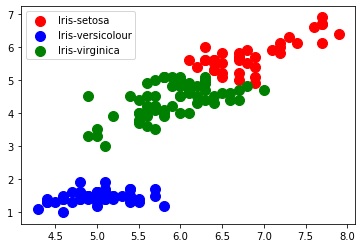

In [41]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
#plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')

plt.legend()